In [1]:
import deepchem as dc

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
d:\unsolth_env\deep_learning_env\lib\site-packages\transformers\utils\hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot imp

In [16]:
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim
import torch
import pandas as pd

In [4]:
# Load the data from deepchem

In [5]:
tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='Raw', split='random')

'split' is deprecated.  Use 'splitter' instead.
[18:16:33] WARNING: not removing hydrogen atom without neighbors
[18:16:33] Explicit valence for atom # 8 Al, 6, is greater than permitted
Failed to featurize datapoint 1322, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(class RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True, bool includeAtomMaps=True, bool includeChiralPresence=False)
[18:16:33] Explicit valence for atom # 3 Al, 6, is greater than permitted
Failed to featurize datapoint 2290, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(class RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True, bool includeAtomMaps=True, bool includeChiralPre

In [9]:
train_dataset,val_dataset,test_dataset = datasets

In [10]:
train_dataset

<DiskDataset X.shape: (np.int64(6258),), y.shape: (np.int64(6258), np.int64(12)), w.shape: (np.int64(6258), np.int64(12)), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>

In [13]:
smiles_list = train_dataset.ids[:10]
labels = train_dataset.y[:10]

In [17]:
df = pd.DataFrame(labels, columns=tasks)
df.insert(0, "SMILES", smiles_list)
print(df)

                                              SMILES  NR-AR  NR-AR-LBD  \
0  CC[N+](CC)(CCNC(=O)C(=O)NCC[N+](CC)(CC)Cc1cccc...    0.0        0.0   
1                                        O=CN1CCOCC1    0.0        0.0   
2                     COC(=O)C1(O)c2ccccc2-c2ccccc21    0.0        0.0   
3                           CCOC(=O)CCCCCCCCC(=O)OCC    0.0        0.0   
4                  O=C(O)c1ccccc1Nc1cccc(C(F)(F)F)c1    0.0        0.0   
5  C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...    0.0        0.0   
6  CC(C)COC(=O)OCN1C(=O)CN(CCN2CC(=O)N(COC(=O)OCC...    0.0        0.0   
7                                         OCC(Cl)CCl    0.0        0.0   
8                         Cc1ccc([N+](=O)[O-])c(N)c1    0.0        0.0   
9             N[C@H]1C(O)O[C@H](CO)[C@@H](O)[C@@H]1O    0.0        0.0   

   NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  SR-ARE  SR-ATAD5  \
0     0.0           0.0    0.0        0.0            0.0     0.0       0.0   
1     0.0           0.0    0.

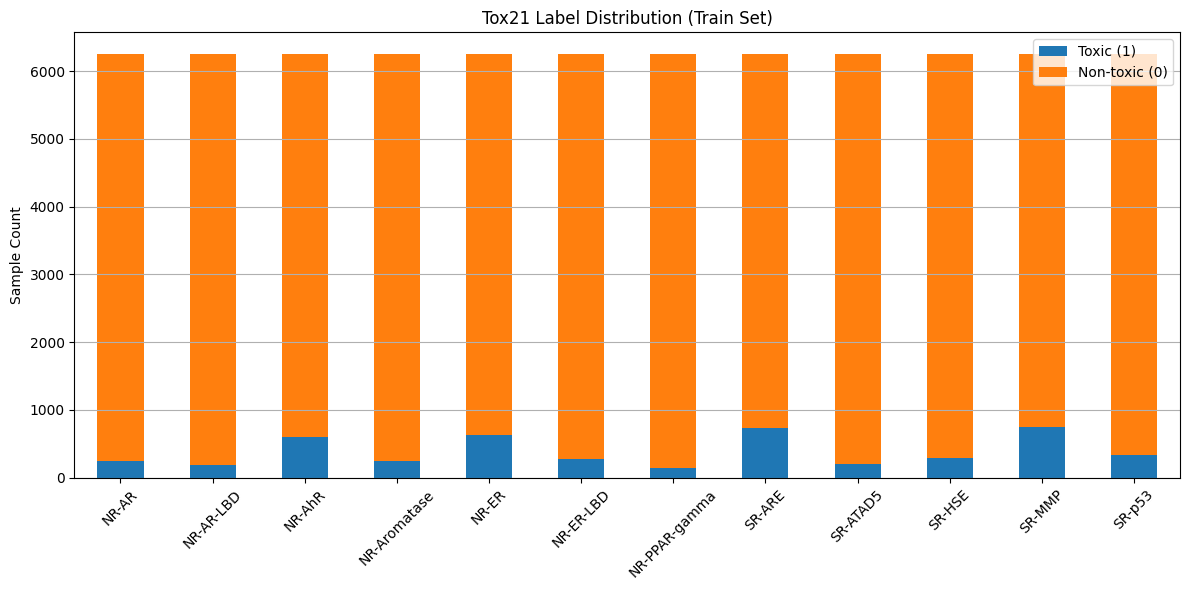

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Count 1s (toxic), ignoring NaNs
label_df = pd.DataFrame(train_dataset.y, columns=tasks)
label_counts = label_df.apply(lambda col: pd.Series({
    'Toxic (1)': np.sum(col == 1),
    'Non-toxic (0)': np.sum(col == 0),
    'Missing (NaN)': np.sum(np.isnan(col))
}), axis=0).T

label_counts[['Toxic (1)', 'Non-toxic (0)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel("Sample Count")
plt.title("Tox21 Label Distribution (Train Set)")
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
summary_stats = pd.DataFrame({
    "Total Samples": label_df.shape[0],
    "Labeled": label_df.notna().sum(),
    "Toxic": (label_df == 1).sum(),
    "Non-toxic": (label_df == 0).sum(),
    "Missing": label_df.isna().sum()
}).T

print(summary_stats)


               NR-AR  NR-AR-LBD  NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  \
Total Samples   6258       6258    6258          6258   6258       6258   
Labeled         6258       6258    6258          6258   6258       6258   
Toxic            247        194     604           246    625        283   
Non-toxic       6011       6064    5654          6012   5633       5975   
Missing            0          0       0             0      0          0   

               NR-PPAR-gamma  SR-ARE  SR-ATAD5  SR-HSE  SR-MMP  SR-p53  
Total Samples           6258    6258      6258    6258    6258    6258  
Labeled                 6258    6258      6258    6258    6258    6258  
Toxic                    147     737       197     297     747     330  
Non-toxic               6111    5521      6061    5961    5511    5928  
Missing                    0       0         0       0       0       0  


In [22]:
label_df = pd.DataFrame(train_dataset.y, columns=tasks)
missing_counts = label_df.isna().sum()
positive_counts = (label_df == 1).sum()
negative_counts = (label_df == 0).sum()

label_summary = pd.DataFrame({
    'Toxic (1)': positive_counts,
    'Non-Toxic (0)': negative_counts,
    'Missing (NaN)': missing_counts
})

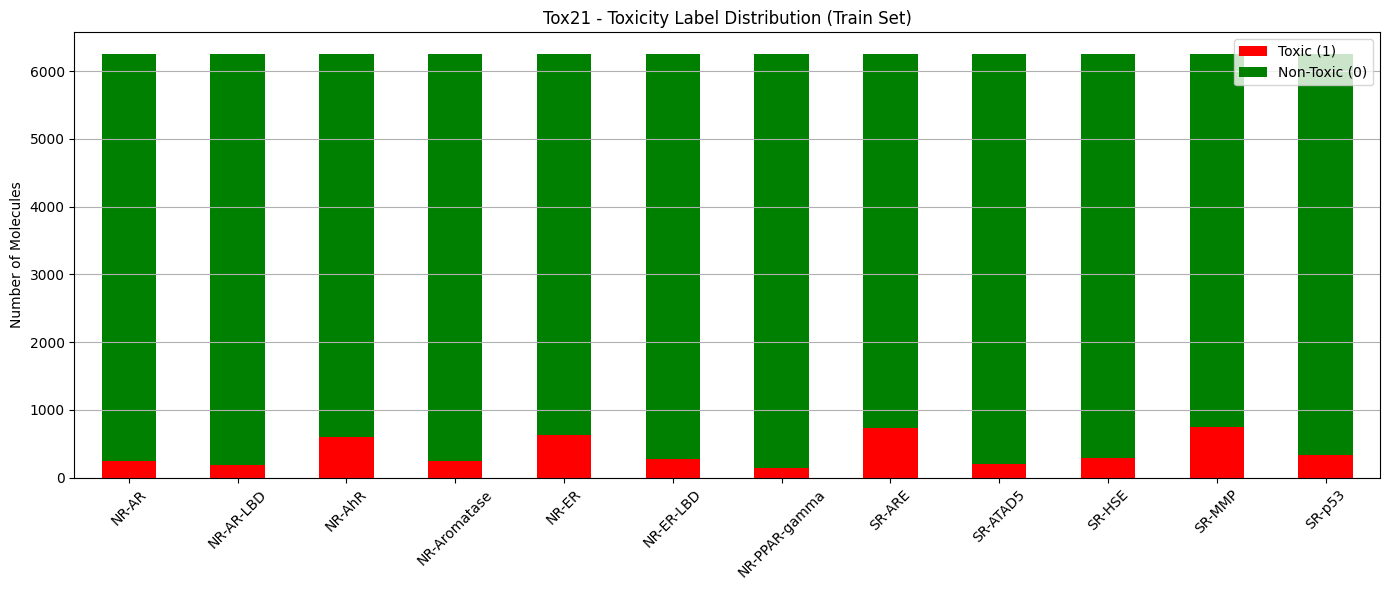

In [23]:
fig, ax = plt.subplots(figsize=(14, 6))
label_summary[['Toxic (1)', 'Non-Toxic (0)']].plot(kind='bar', stacked=True, ax=ax, color=['red', 'green'])
plt.title("Tox21 - Toxicity Label Distribution (Train Set)")
plt.ylabel("Number of Molecules")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [27]:
def tokenize(smiles):
    """Tokenize smile strings into a list of characters"""
    return list(smiles)

In [30]:
smiles_list1 = tokenize("O=CN1CCOCC1")
smiles_list1

['O', '=', 'C', 'N', '1', 'C', 'C', 'O', 'C', 'C', '1']

In [48]:
smiles_list1

['O', '=', 'C', 'N', '1', 'C', 'C', 'O', 'C', 'C', '1']

In [49]:
set(smiles_list1)

{'1', '=', 'C', 'N', 'O'}

In [50]:
token_ids = {token : i+1 for i,token in enumerate(sorted(smiles_list1))}
token_ids

{'1': 2, '=': 3, 'C': 8, 'N': 9, 'O': 11}

In [ ]:
def build_vocabulary(smiles_list):
    """Creates a token to id vocabulary"""
    tokens = set(char for s in smiles_list for char in tokenize(s))
    vocab = {token : i + 1 for i,token in enumerate(sorted(tokens))}
    vocab['<PAD>'] = 0
    return vocab

In [55]:
vocab = build_vocabulary(smiles_list1)

In [57]:
vocab

{'1': 1, '=': 2, 'C': 3, 'N': 4, 'O': 5, '<PAD>': 0}

In [56]:
vocab.get('C',0)

3

In [58]:
def encode_smiles(smiles,vocab,max_len=120):
    """Converts a smile string to padded length of token indices"""
    tokens = tokenize(smiles)
    token_ids = [vocab.get(tok,0) for tok in tokens]
    token_ids = token_ids[:max_len]
    padding = [0] * (max_len - len(token_ids))
    return token_ids + padding

In [62]:
encoding = encode_smiles("O=CN1CCOCC1",vocab)

In [63]:
len(encoding)

120

# Custom Dataset

In [64]:
class SMILESDataset(Dataset):
    def __init__(self,smiles_list,labels,weights,vocab,max_len = 120):
        self.smiles_list = smiles_list
        self.labels = labels 
        self.weights = weights
        self.vocab = vocab 
        self.max_len = max_len

    def __len__(self):
        return len(self.smiles_list)

    def __getitem__(self,idx):
        smiles = self.smiles_list[idx]
        label = self.labels[idx]
        weight = self.weights[idx]

        input_ids = encode_smiles(smiles,self.vocab,self.max_len)

        return (
            torch.tensor(input_ids, dtype=torch.long),
            torch.tensor(label, dtype=torch.float32),
            torch.tensor(weight, dtype=torch.float32)
        )


In [68]:
smiles_train, y_train, w_train = train_dataset.ids,train_dataset.y, train_dataset.w
smiles_val, y_val, w_val = val_dataset.ids, val_dataset.y, val_dataset.w
smiles_test, y_test, w_test = test_dataset.ids, test_dataset.y, test_dataset.w

In [70]:
vocabulary = build_vocabulary(smiles_train)

In [74]:
vocabulary

{'#': 1,
 '(': 2,
 ')': 3,
 '+': 4,
 '-': 5,
 '.': 6,
 '/': 7,
 '1': 8,
 '2': 9,
 '3': 10,
 '4': 11,
 '5': 12,
 '6': 13,
 '7': 14,
 '8': 15,
 '9': 16,
 '=': 17,
 '@': 18,
 'A': 19,
 'B': 20,
 'C': 21,
 'D': 22,
 'F': 23,
 'G': 24,
 'H': 25,
 'I': 26,
 'K': 27,
 'M': 28,
 'N': 29,
 'O': 30,
 'P': 31,
 'S': 32,
 'T': 33,
 'V': 34,
 'Y': 35,
 'Z': 36,
 '[': 37,
 '\\': 38,
 ']': 39,
 'a': 40,
 'b': 41,
 'c': 42,
 'd': 43,
 'e': 44,
 'g': 45,
 'i': 46,
 'l': 47,
 'n': 48,
 'o': 49,
 'r': 50,
 's': 51,
 't': 52,
 'u': 53,
 'y': 54,
 '<PAD>': 0}

In [78]:
len(vocabulary)


55

In [79]:
max_len = 120
batch_size = 32

In [77]:
train_dataset = SMILESDataset(smiles_train, y_train, w_train, vocab, max_len)
val_dataset = SMILESDataset(smiles_val, y_val, w_val, vocab, max_len)
test_dataset = SMILESDataset(smiles_test, y_test, w_test, vocab, max_len)

In [80]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [81]:
tasks

['NR-AR',
 'NR-AR-LBD',
 'NR-AhR',
 'NR-Aromatase',
 'NR-ER',
 'NR-ER-LBD',
 'NR-PPAR-gamma',
 'SR-ARE',
 'SR-ATAD5',
 'SR-HSE',
 'SR-MMP',
 'SR-p53']

In [82]:
len(tasks)

12

In [84]:
num_labels = len(tasks)  # output dimension of lstm
vocab_size = len(vocabulary)  # to create the embeddings

In [86]:
iterator = iter(train_loader)
batch = next(iterator)

In [89]:
smile,labels,weights = batch

In [ ]:
smile

tensor([[3, 3, 0,  ..., 0, 0, 0],
        [3, 3, 4,  ..., 0, 0, 0],
        [3, 3, 3,  ..., 0, 0, 0],
        ...,
        [5, 3, 1,  ..., 0, 0, 0],
        [3, 4, 0,  ..., 0, 0, 0],
        [3, 3, 3,  ..., 0, 0, 0]])

In [93]:
labels

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0

In [94]:
weights

tensor([[ 1.0444,  1.0374,  1.1304,  0.0000,  0.0000,  1.0536,  1.0294,  6.3094,
          1.0362,  1.0612,  6.2289,  1.0651],
        [ 1.0444,  1.0374,  1.1304,  1.0558,  0.0000,  1.0536,  1.0294,  0.0000,
          1.0362,  0.0000,  1.1912,  1.0651],
        [ 1.0444,  1.0374,  1.1304,  0.0000,  1.1444,  1.0536,  1.0294,  0.0000,
          1.0362,  1.0612,  1.1912,  1.0651],
        [23.5020, 27.7423,  1.1304,  0.0000,  0.0000,  1.0536,  1.0294,  1.1883,
          1.0362,  1.0612,  1.1912,  1.0651],
        [ 1.0444,  1.0374,  1.1304,  1.0558,  1.1444,  1.0536,  1.0294,  1.1883,
          1.0362,  1.0612,  1.1912,  1.0651],
        [ 1.0444,  1.0374,  1.1304,  1.0558,  1.1444,  1.0536,  1.0294,  1.1883,
          1.0362,  1.0612,  1.1912,  1.0651],
        [ 1.0444,  1.0374,  0.0000,  0.0000,  1.1444,  1.0536,  1.0294,  0.0000,
          1.0362,  0.0000,  0.0000,  1.0651],
        [ 1.0444,  1.0374,  1.1304,  1.0558,  1.1444,  1.0536,  1.0294,  0.0000,
          1.0362,  0.0000,  1.

# Creating the SMILES LSTM Model

In [149]:
class SMILESLstm(nn.Module):
    def __init__(self,vocab_size,embedding_dim=128,hidden_dim = 256,num_layers = 2,output_dim = 12,dropout = 0.3):
        super(SMILESLstm, self).__init__()
        self.embeddings = nn.Embedding(vocab_size,embedding_dim,padding_idx = 0)

        # lstm layer
        self.lstm = nn.LSTM(
            input_size = embedding_dim,
            hidden_size = hidden_dim,
            num_layers = num_layers,
            dropout = dropout,
            batch_first = True,
            bidirectional = True
        )

        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self,x):
        embedded = self.embeddings(x)
        lstm_out,(hn,cn) = self.lstm(embedded)
        last_hidden = hn[-1]
        dropped = self.dropout(last_hidden)
        output = self.fc(dropped)
        return output



In [160]:
model = SMILESLstm(vocab_size)

In [161]:
model

SMILESLstm(
  (embeddings): Embedding(55, 128, padding_idx=0)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (fc): Linear(in_features=256, out_features=12, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [162]:
# training the model/

In [163]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [164]:
device

'cuda'

In [165]:
from tqdm.notebook import tqdm

In [166]:
def train(model, train_loader, val_loader, num_epochs, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-5)
    loss_fn = nn.BCEWithLogitsLoss(reduction='none')

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
        for x, y, w in train_bar:
            x, y, w = x.to(device), y.to(device), w.to(device)

            optimizer.zero_grad()
            output = model(x)              # shape: (batch, 12)
            loss = loss_fn(output, y)     # raw loss (no reduction), shape: (batch, 12)
            loss = loss * w               # mask NaNs using weights
            loss = loss.sum() / w.sum()   # average only over valid labels

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            train_bar.set_postfix(loss=loss.item())

        avg_loss = total_loss / len(train_loader)
        val_loss = evaluate(model, val_loader, loss_fn, device)
        print(f"🌟 Epoch {epoch+1}/{num_epochs} | 🏋️‍♂️ Train Loss: {avg_loss:.4f} | 📉 Val Loss: {val_loss:.4f}")

In [167]:
@torch.no_grad()
def evaluate(model, loader, loss_fn, device):
    model.eval()
    total_loss = 0

    for x, y, w in loader:
        x, y, w = x.to(device), y.to(device), w.to(device)

        output = model(x)
        loss = loss_fn(output, y)
        loss = loss * w
        loss = loss.sum() / w.sum()
        total_loss += loss.item()

    return total_loss / len(loader)

In [168]:
train(model,train_loader,val_loader,num_epochs = 20)

Epoch 1/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 1/20 | 🏋️‍♂️ Train Loss: 0.6719 | 📉 Val Loss: 0.6947


Epoch 2/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 2/20 | 🏋️‍♂️ Train Loss: 0.6664 | 📉 Val Loss: 0.6746


Epoch 3/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 3/20 | 🏋️‍♂️ Train Loss: 0.6520 | 📉 Val Loss: 0.6533


Epoch 4/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 4/20 | 🏋️‍♂️ Train Loss: 0.6333 | 📉 Val Loss: 0.6389


Epoch 5/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 5/20 | 🏋️‍♂️ Train Loss: 0.6059 | 📉 Val Loss: 0.6278


Epoch 6/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 6/20 | 🏋️‍♂️ Train Loss: 0.5913 | 📉 Val Loss: 0.6206


Epoch 7/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 7/20 | 🏋️‍♂️ Train Loss: 0.5767 | 📉 Val Loss: 0.6135


Epoch 8/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 8/20 | 🏋️‍♂️ Train Loss: 0.5634 | 📉 Val Loss: 0.5875


Epoch 9/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 9/20 | 🏋️‍♂️ Train Loss: 0.5471 | 📉 Val Loss: 0.5711


Epoch 10/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 10/20 | 🏋️‍♂️ Train Loss: 0.5263 | 📉 Val Loss: 0.5745


Epoch 11/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 11/20 | 🏋️‍♂️ Train Loss: 0.5165 | 📉 Val Loss: 0.5805


Epoch 12/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 12/20 | 🏋️‍♂️ Train Loss: 0.4973 | 📉 Val Loss: 0.5665


Epoch 13/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 13/20 | 🏋️‍♂️ Train Loss: 0.4761 | 📉 Val Loss: 0.5805


Epoch 14/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 14/20 | 🏋️‍♂️ Train Loss: 0.4637 | 📉 Val Loss: 0.5743


Epoch 15/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 15/20 | 🏋️‍♂️ Train Loss: 0.4506 | 📉 Val Loss: 0.5696


Epoch 16/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 16/20 | 🏋️‍♂️ Train Loss: 0.4360 | 📉 Val Loss: 0.5519


Epoch 17/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 17/20 | 🏋️‍♂️ Train Loss: 0.4228 | 📉 Val Loss: 0.5569


Epoch 18/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 18/20 | 🏋️‍♂️ Train Loss: 0.4098 | 📉 Val Loss: 0.5644


Epoch 19/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 19/20 | 🏋️‍♂️ Train Loss: 0.3892 | 📉 Val Loss: 0.6091


Epoch 20/20:   0%|          | 0/196 [00:00<?, ?it/s]

🌟 Epoch 20/20 | 🏋️‍♂️ Train Loss: 0.3810 | 📉 Val Loss: 0.5959


In [171]:
@torch.no_grad()
def evaluate_on_test(model, test_loader, device='cuda' if torch.cuda.is_available() else 'cpu'):
    from sklearn.metrics import roc_auc_score, f1_score

    model.eval()
    y_true, y_pred, y_mask = [], [], []

    for x, y, w in test_loader:
        x, y, w = x.to(device), y.to(device), w.to(device)
        logits = model(x)
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).float()

        y_true.append(y.cpu().numpy())
        y_pred.append(preds.cpu().numpy())
        y_mask.append(w.cpu().numpy())

    y_true = np.concatenate(y_true, axis=0)
    y_pred = np.concatenate(y_pred, axis=0)
    y_mask = np.concatenate(y_mask, axis=0)

    aucs, f1s = [], []
    for i in range(y_true.shape[1]):
        mask = y_mask[:, i] == 1
        if np.sum(mask) < 2:  # skip targets with no data
            aucs.append(np.nan)
            f1s.append(np.nan)
            continue

        try:
            auc = roc_auc_score(y_true[mask, i], y_pred[mask, i])
            f1 = f1_score(y_true[mask, i], y_pred[mask, i])
            aucs.append(auc)
            f1s.append(f1)
        except Exception as e:
            aucs.append(np.nan)
            f1s.append(np.nan)

    mean_auc = np.nanmean(aucs)
    mean_f1 = np.nanmean(f1s)

    print(f"🎯 Mean ROC-AUC: {mean_auc:.4f}")
    print(f"🧠 Mean F1-score: {mean_f1:.4f}")

    return mean_auc, mean_f1, aucs


In [178]:
def encode_smiles(smiles, char_to_idx, max_len=120):
    pad_idx = char_to_idx['<PAD>']

    # Replace unknown characters with <pad> (or skip them if you want)
    encoded = [char_to_idx[c] if c in char_to_idx else pad_idx for c in smiles]

    # Pad or truncate
    if len(encoded) < max_len:
        encoded += [pad_idx] * (max_len - len(encoded))
    else:
        encoded = encoded[:max_len]

    return torch.tensor(encoded).unsqueeze(0)  # shape: (1, max_len)



In [179]:
@torch.no_grad()
def predict_toxicity(smiles_str, model, char_to_idx, threshold=0.5):
    model.eval()
    input_tensor = encode_smiles(smiles_str, char_to_idx).to(device)

    logits = model(input_tensor)             # shape: (1, 12)
    probs = torch.sigmoid(logits).squeeze()  # shape: (12,)
    preds = (probs > threshold).int()

    return probs.cpu().numpy(), preds.cpu().numpy()

In [190]:
import matplotlib.pyplot as plt

def plot_toxicity_scores(smiles_str, probs, tox21_targets):
    codes = [code for code, _ in tox21_targets]
    names = [name for _, name in tox21_targets]

    plt.figure(figsize=(10, 6))
    bars = plt.barh(range(len(probs)), probs, color=['tomato' if p > 0.5 else 'mediumseagreen' for p in probs])
    
    plt.yticks(range(len(probs)), names)
    plt.xlabel("Predicted Toxicity Score (Probability)")
    plt.title(f"Toxicity Prediction for SMILES: {smiles_str}")
    plt.xlim(0, 1)

    # Add values on bars
    for i, bar in enumerate(bars):
        plt.text(bar.get_width() + 0.01, bar.get_y() + 0.4, f"{probs[i]:.2f}", fontsize=9)

    plt.tight_layout()
    plt.show()

In [186]:
tox21_targets = [
    ("NR-AR", "Androgen Receptor"),
    ("NR-AR-LBD", "Androgen Receptor LBD"),
    ("NR-AhR", "Aryl Hydrocarbon Receptor"),
    ("NR-Aromatase", "Aromatase"),
    ("NR-ER", "Estrogen Receptor"),
    ("NR-ER-LBD", "Estrogen Receptor LBD"),
    ("NR-PPAR-gamma", "PPAR Gamma Receptor"),
    ("SR-ARE", "Antioxidant Response Element"),
    ("SR-ATAD5", "ATAD5 DNA Repair Pathway"),
    ("SR-HSE", "Heat Shock Response Element"),
    ("SR-MMP", "Mitochondrial Membrane Potential"),
    ("SR-p53", "p53 Tumor Suppressor Pathway")
]


🧪 Toxicity Prediction for SMILES: C1=CC=CC=C1

NR-AR        | Androgen Receptor                             | Score: 0.095 | ❌ Non-toxic
NR-AR-LBD    | Androgen Receptor LBD                         | Score: 0.670 | ✅ Toxic
NR-AhR       | Aryl Hydrocarbon Receptor                     | Score: 0.299 | ❌ Non-toxic
NR-Aromatase | Aromatase                                     | Score: 0.429 | ❌ Non-toxic
NR-ER        | Estrogen Receptor                             | Score: 0.314 | ❌ Non-toxic
NR-ER-LBD    | Estrogen Receptor LBD                         | Score: 0.580 | ✅ Toxic
NR-PPAR-gamma | PPAR Gamma Receptor                           | Score: 0.646 | ✅ Toxic
SR-ARE       | Antioxidant Response Element                  | Score: 0.554 | ✅ Toxic
SR-ATAD5     | ATAD5 DNA Repair Pathway                      | Score: 0.258 | ❌ Non-toxic
SR-HSE       | Heat Shock Response Element                   | Score: 0.662 | ✅ Toxic
SR-MMP       | Mitochondrial Membrane Potential              | Score: 0

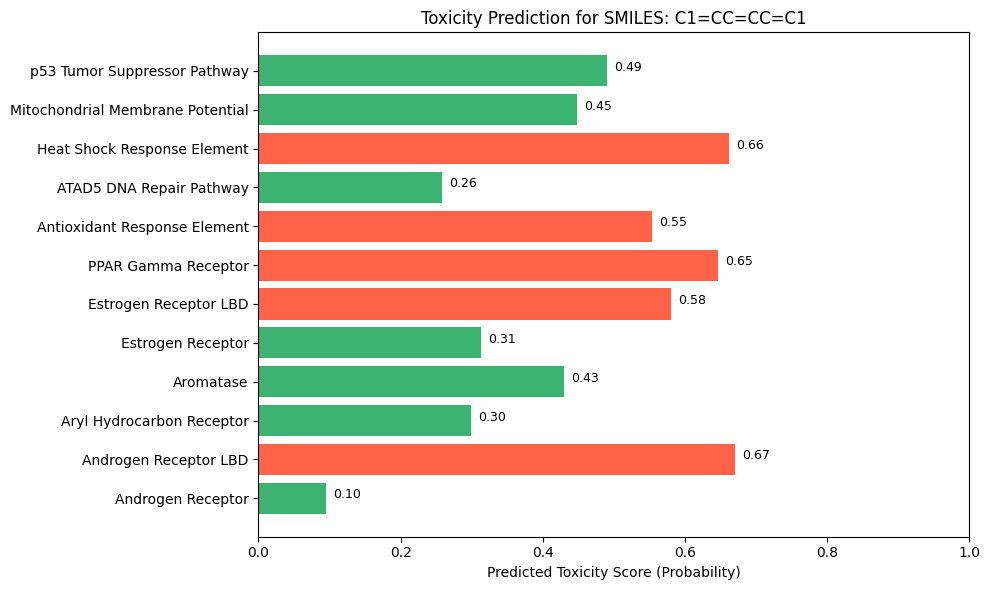

In [191]:
test_smiles = "C1=CC=CC=C1"

char_to_idx = {char: idx for idx, char in enumerate(vocabulary)}

probs, preds = predict_toxicity(test_smiles, model, char_to_idx)

print(f"\n🧪 Toxicity Prediction for SMILES: {test_smiles}\n")
for i, (code, name) in enumerate(tox21_targets):
    prob = probs[i]
    label = "✅ Toxic" if preds[i] else "❌ Non-toxic"
    print(f"{code:12} | {name:45} | Score: {prob:.3f} | {label}")

plot_toxicity_scores(test_smiles, probs, tox21_targets)

In [189]:
torch.save(model.state_dict(),"../lstm_model_target_prediction.pth")


In [192]:
# save the vocabualary

In [195]:
import pickle

with open("../vocab.pkl", "wb") as f:
    pickle.dump(vocabulary, f)

In [196]:
import pickle

with open("../vocab.pkl", "rb") as f:
    char_to_idx = pickle.load(f)